APPLICATION OF SIMPLE MACHINE LEARNING REGRESSION METHODS AND BASIC NEURAL NETWORKS
TO A DISTANCE ESTIMATION PROBLEM ON THE KITTY OBJECT DETECTION DATASET. 

THE TRAINING DATA INCLUDE A SECTION OF THE INFORMATION (FEATURES) PROVIDED IN THE LABEL 
TXT FILES, CONVERTED TO A TABULAR REPRESENTATION. 

THE TRAINING IS PERFORMED INITIALLY WITH MULTIPLE FEATURES AS INPUT TO THE MODELS.

THE LABEL IS TAKEN AS THE 'zloc' VARIABLE REPRESENTING THE DISTANCE OF THE OBJECT
FROM THE CAMERA.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, Lasso, Ridge
#from sklearn.svm import SVR, LinearSVR, NuSVR
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import cv2
from PIL import Image

In [94]:
# Image parameters
w = 1242
h = 375
d = 3
cR = (0, 0, 255)
cG = (0, 255, 0)
cB = (255, 0, 0)
cK = (0, 0, 0)

# IMPORT DATA

In [63]:
# IMPORT DATA
df = pd.read_csv('annotations.csv')
#print(df.info()) # Display the information

import cv2
from PIL import Image
idx = round(np.random.rand()*6492)
file = df.iloc[idx,0]

odf_file = df[df['filename']==file]

#im = Image.open('images/training/image_2/'+file)
#im.show()

''' Check Images on bounding boxes
im = cv2.imread('images/training/image_2/'+file.replace('.txt','.png'))
res = im.copy()
for id in range(len(odf_file)):
    bbox = odf_file.iloc[id,5:9].to_numpy()
    cv2.rectangle(res, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), cR, 2)

cv2.imshow("Distance", res)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
odf_file

,filename,class,truncated,occluded,observation angle,xmin,ymin,xmax,ymax,height,width,length,xloc,yloc,zloc,rot_y
2053,000284.txt,Car,0.00,0,-1.84,686.55,185.67,795.16,256.90,1.41,1.51,3.45,2.81,1.72,16.41,-1.68
2054,000284.txt,Car,0.67,0,-2.43,0.00,194.00,170.36,358.84,1.48,1.62,3.63,-6.90,1.74,7.43,3.12
2055,000284.txt,Car,0.00,1,-2.65,83.80,191.17,370.06,285.66,1.44,1.64,4.01,-6.41,1.78,12.27,-3.12
2056,000284.txt,Car,0.00,2,-2.77,224.52,190.75,413.86,257.73,1.43,1.60,3.78,-6.75,1.88,16.90,3.14
2057,000284.txt,Car,0.00,2,-2.78,285.14,186.73,443.22,246.81,1.48,1.59,3.64,-6.49,1.88,19.16,-3.10
2058,000284.txt,Car,0.00,1,-1.73,645.40,182.47,708.98,225.99,1.42,1.63,4.15,2.31,1.78,26.14,-1.64
2059,000284.txt,Car,0.00,2,0.21,406.42,185.53,515.89,223.49,1.47,1.65,4.15,-6.10,2.02,29.71,0.01
2060,000284.txt,Car,0.00,2,-2.96,428.17,175.37,501.76,212.31,1.70,1.61,3.21,-6.95,1.84,34.63,3.13
2061,000284.txt,Car,0.00,1,-1.63,628.80,175.58,654.21,199.23,1.76,1.71,4.35,2.41,2.00,56.36,-1.59
2062,000284.txt,DontCare,-1.00,-1,-10.00,520.31,171.14,625.69,204.23,-1.00,-1.00,-1.00,-1000.00,-1000.00,-1000.00,-10.00


In [64]:
# ADD ADDITIONAL FEATURES
df['size'] = (df['xmax'] - df['xmin'])*(df['ymax'] - df['ymin'])/(h*w)
df['volume'] = df['height']*df['width']*df['length']
df['area'] = df['height']*df['width']

df['xmin'] = df['xmin']/w
df['xmax'] = df['xmax']/w
df['ymin'] = df['ymin']/h
df['ymax'] = df['ymax']/h

df

,filename,class,truncated,occluded,observation angle,xmin,ymin,xmax,ymax,height,width,length,xloc,yloc,zloc,rot_y,size,volume,area
0,000000.txt,Pedestrian,0.0,0,-0.20,0.573591,0.381333,0.652762,0.821120,1.89,0.48,1.20,1.84,1.47,8.41,0.01,0.034818,1.088640,0.9072
1,000001.txt,Truck,0.0,0,-1.57,0.482617,0.417067,0.507045,0.504667,2.85,2.63,12.34,0.47,1.49,69.44,-1.56,0.002140,92.494470,7.4955
2,000001.txt,Car,0.0,0,1.85,0.312101,0.484107,0.341232,0.541653,1.67,1.87,3.69,-16.53,2.39,58.49,1.57,0.001676,11.523501,3.1229
3,000001.txt,Cyclist,0.0,3,-1.65,0.544767,0.437200,0.554734,0.517147,1.86,0.60,2.02,4.59,1.32,45.84,-1.55,0.000797,2.254320,1.1160
4,000001.txt,DontCare,-1.0,-1,-10.00,0.405709,0.452560,0.475531,0.507013,-1.00,-1.00,-1.00,-1000.00,-1000.00,-1000.00,-10.00,0.003802,-1.000000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51860,007480.txt,Car,0.0,2,-2.91,0.308132,0.479227,0.398937,0.584267,1.48,1.63,4.10,-6.79,1.78,28.78,-3.14,0.009538,9.890840,2.4124
51861,007480.txt,Car,0.0,0,-1.69,0.508623,0.479600,0.546216,0.571653,1.41,1.56,4.08,1.90,1.74,31.98,-1.63,0.003461,8.974368,2.1996
51862,007480.txt,Car,0.0,2,-1.62,0.499130,0.471733,0.520942,0.533120,1.43,1.58,3.37,1.47,1.71,47.02,-1.59,0.001339,7.614178,2.2594
51863,007480.txt,Van,0.0,2,-1.58,0.487279,0.449173,0.500105,0.499520,2.33,1.96,6.11,0.39,1.83,93.03,-1.57,0.000646,27.903148,4.5668


In [65]:
# FILTER THE DATA IF A CERTAIN CLASS IS TO BE FILTERED AND CERTAIN ATTRIBUTES TO BE CORRECTED.
# SKIP THIS TO TRAIN WITH ALL CLASSES
df_class = df[df['class']=='Car'] # Filter cars
df_class = df_class[df_class['occluded']<=1] # Filter not occluded cars
df_class = df_class[df_class['zloc']>0] # Filter cars with positive zlocs
df_class.info() # Display Info - Total number of examples to train with

<class 'pandas.core.frame.DataFrame'>
Index: 21640 entries, 2 to 51861
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   filename           21640 non-null  object 
 1   class              21640 non-null  object 
 2   truncated          21640 non-null  float64
 3   occluded           21640 non-null  int64  
 4   observation angle  21640 non-null  float64
 5   xmin               21640 non-null  float64
 6   ymin               21640 non-null  float64
 7   xmax               21640 non-null  float64
 8   ymax               21640 non-null  float64
 9   height             21640 non-null  float64
 10  width              21640 non-null  float64
 11  length             21640 non-null  float64
 12  xloc               21640 non-null  float64
 13  yloc               21640 non-null  float64
 14  zloc               21640 non-null  float64
 15  rot_y              21640 non-null  float64
 16  size               21640 no

In [66]:
df_class.head()

,filename,class,truncated,occluded,observation angle,xmin,ymin,xmax,ymax,height,width,length,xloc,yloc,zloc,rot_y,size,volume,area
2,000001.txt,Car,0.0,0,1.85,0.312101,0.484107,0.341232,0.541653,1.67,1.87,3.69,-16.53,2.39,58.49,1.57,0.001676,11.523501,3.1229
9,000002.txt,Car,0.0,0,-1.67,0.529300,0.507013,0.563663,0.595707,1.41,1.58,4.36,3.18,2.27,34.38,-1.58,0.003048,9.713208,2.2278
10,000003.txt,Car,0.0,0,1.55,0.494557,0.484747,0.585596,0.759387,1.57,1.73,4.15,1.00,1.75,13.22,1.62,0.025003,11.271815,2.7161
13,000004.txt,Car,0.0,0,1.96,0.225749,0.493600,0.277697,0.574907,1.49,1.76,4.01,-15.71,2.16,38.26,1.57,0.004224,10.515824,2.6224
14,000004.txt,Car,0.0,0,1.88,0.293994,0.492107,0.326981,0.547200,1.38,1.80,3.41,-15.89,2.23,51.17,1.58,0.001817,8.470440,2.4840


In [67]:
#sc = StandardScaler()
#sc.fit_transform(df_class[['height','width','length']])

mm = MinMaxScaler()
nuval = mm.fit_transform(df_class[['height','width','length','xloc','yloc','zloc','size','volume','area']])

In [68]:
# NORMALIZE THE LAST COLUMNS
print('Maximum values before and after normalization')
print(df_class['height'].abs().max())
print(df_class['width'].abs().max())
print(df_class['length'].abs().max())

print(df_class['xloc'].abs().max())
print(df_class['yloc'].abs().max(),'\n')

#print(df_class['zloc'].abs().min())
#print(df_class['zloc'].abs().max(),'\n')

zlocmax = df_class['zloc'].abs().max()
zlocmin = df_class['zloc'].abs().min()

# create dataset for training
ds_class = df_class.drop(columns=['class','truncated','occluded'])
ds_class[['height','width','length','xloc','yloc','zloc','size','volume','area']] = nuval

print(ds_class['height'].abs().max())
print(ds_class['width'].abs().max())
print(ds_class['length'].abs().max())

print(ds_class['xloc'].abs().max())
print(ds_class['yloc'].abs().max())

# REMOVE FEATURES IF NECESSARY
# ds_class.drop(columns=['observation angle','rot_y'],inplace=True)

Maximum values before and after normalization
2.48
2.04
6.67
44.03
4.09 

0.9999999999999999
1.0
1.0
1.0
1.0


In [69]:
# FINAL DATASET FOR TRAINING
ds_class.head()


,filename,observation angle,xmin,ymin,xmax,ymax,height,width,length,xloc,yloc,zloc,rot_y,size,volume,area
2,000001.txt,1.85,0.312101,0.484107,0.341232,0.541653,0.395522,0.808989,0.334821,0.327810,0.727127,0.678023,1.57,0.005858,0.274983,0.500293
9,000002.txt,-1.67,0.529300,0.507013,0.563663,0.595707,0.201493,0.483146,0.484375,0.562761,0.707865,0.397674,-1.58,0.010785,0.200372,0.172825
10,000003.txt,1.55,0.494557,0.484747,0.585596,0.759387,0.320896,0.651685,0.437500,0.536774,0.624398,0.151628,1.62,0.089666,0.264610,0.351467
13,000004.txt,1.96,0.225749,0.493600,0.277697,0.574907,0.261194,0.685393,0.406250,0.337585,0.690209,0.442791,1.57,0.015010,0.233452,0.317187
14,000004.txt,1.88,0.293994,0.492107,0.326981,0.547200,0.179104,0.730337,0.272321,0.335439,0.701445,0.592907,1.58,0.006364,0.149151,0.266554


Text(0.5, 0.98, 'Object distance vs bbox size for different object volumes')

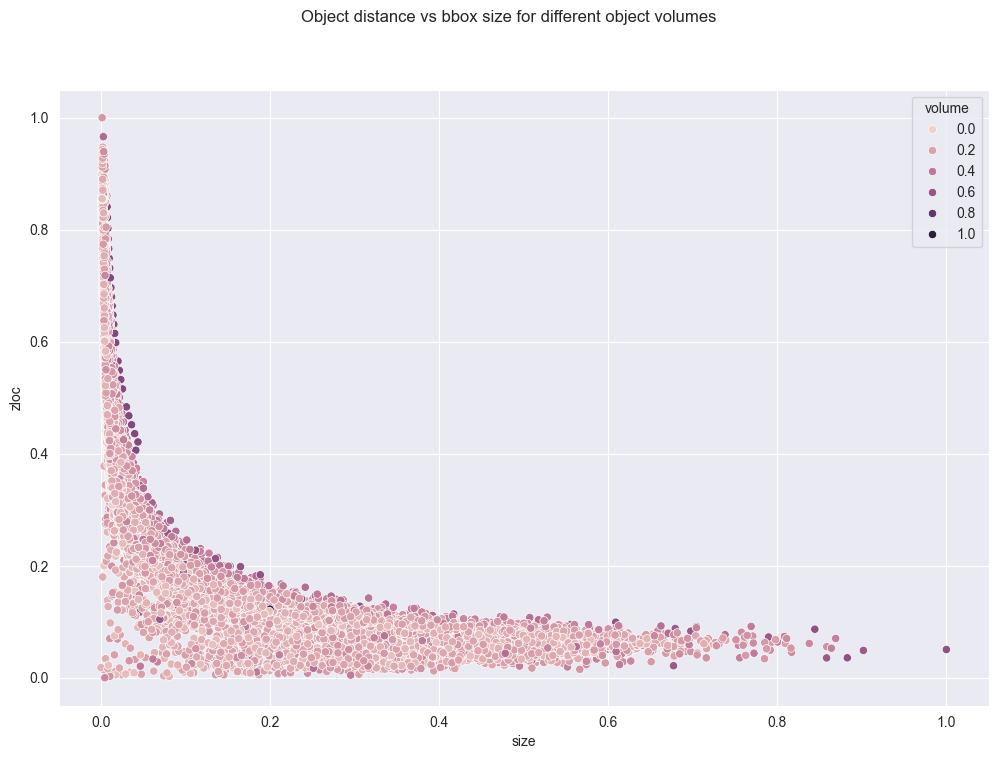

In [102]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(ds_class,x=ds_class['size'],y=ds_class['zloc'],hue=ds_class['volume'])
fig.suptitle('Object distance vs bbox size for different object volumes')

# TRAINING

In [71]:
# DATASET PREPARATION
X = ds_class.drop(columns='zloc')
y = ds_class['zloc']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# print(X_test)

Id = X_test['filename']
Bboxes = X_test.iloc[:,2:6]
Bboxes['xmin'] = Bboxes['xmin']*w
Bboxes['xmax'] = Bboxes['xmax']*w
Bboxes['ymin'] = Bboxes['ymin']*h
Bboxes['ymax'] = Bboxes['ymax']*h

X_train.drop(columns=['filename'],inplace=True)
X_test.drop(columns=['filename'],inplace=True)

print(Bboxes)
print(Id)

         xmin    ymin     xmax    ymax
10888  405.09  180.70   504.50  246.40
11524  720.78  166.15   886.41  217.62
42010  577.10  178.35   604.77  200.28
4403   658.74  175.94   699.96  208.89
18092    0.00  198.85   389.27  373.00
...       ...     ...      ...     ...
13767  488.50  173.79   537.73  213.00
39529  421.95  180.71   509.28  241.01
7475    90.70  174.19   370.46  294.19
979    382.74  181.02   491.72  251.10
28963  826.00  187.37  1241.00  374.00

[6492 rows x 4 columns]
10888    001564.txt
11524    001655.txt
42010    006001.txt
4403     000599.txt
18092    002597.txt
            ...    
13767    001991.txt
39529    005628.txt
7475     001045.txt
979      000138.txt
28963    004137.txt
Name: filename, Length: 6492, dtype: object


In [72]:
# LINEAR REGRESSORS
LinReg = LinearRegression()
SGDReg = SGDRegressor(learning_rate='adaptive',penalty='l2',alpha=0.0001,l1_ratio=0.0001, max_iter=100000,tol=1e-6)
RReg = Ridge(alpha=0.001,solver='lsqr')
LS = Lasso(alpha=0.0001,max_iter=10000,tol=1e-6)
ENet = ElasticNet(alpha=0.00001,l1_ratio=0.001,max_iter=100000,tol=1e-6)

LinReg.fit(X=X_train,y=y_train)
SGDReg.fit(X=X_train,y=y_train)
RReg.fit(X=X_train,y=y_train)
LS.fit(X=X_train,y=y_train)
ENet.fit(X=X_train,y=y_train)

# MLP
NN = MLPRegressor(hidden_layer_sizes=(100,20),activation='relu',learning_rate='adaptive',max_iter=10000,tol=1e-6,random_state=1)
NN.fit(X=X_train,y=y_train)
cfs = NN.coefs_
print(cfs[0].shape)
print(cfs[1].shape)
print(cfs[2].shape)

(14, 100)
(100, 20)
(20, 1)


# EVALUATION

In [73]:
# PREDICT WITH THE FITTED MODELS
y_lr = abs(LinReg.predict(X=X_test))
y_sg = abs(SGDReg.predict(X=X_test))
y_rr = abs(RReg.predict(X=X_test))
y_ls = abs(LS.predict(X=X_test))
y_en = abs(ENet.predict(X=X_test))
y_nn = abs(NN.predict(X=X_test))

e_lr = mean_squared_error(y_true=y_test,y_pred=y_lr)
e_sg = mean_squared_error(y_true=y_test,y_pred=y_sg)
e_rr = mean_squared_error(y_true=y_test,y_pred=y_rr)
e_ls = mean_squared_error(y_true=y_test,y_pred=y_ls)
e_en = mean_squared_error(y_true=y_test,y_pred=y_en)
e_nn = mean_squared_error(y_true=y_test,y_pred=y_nn)

e = np.array([[e_lr,e_sg,e_rr,e_ls,e_en,e_nn]])
edf = pd.DataFrame(e,index=['MSE'],columns=['LinReg','LinSGD','Ridge','Lasso','ElasticNet','MLP'])

print('RESULTS')
print('-----------------------------------------------------------------')
print(edf,'\n')

y_o = np.concatenate([y_nn.reshape(-1,1)*(zlocmax-zlocmin)+zlocmin, y_test.to_numpy().reshape(-1,1)*(zlocmax-zlocmin)+zlocmin, Bboxes.values],axis=1)
print(y_o.shape)

# CREATE AND JOIN OUTPUT DATAFRAMES
odf = pd.DataFrame(Id.values,columns=['filename'])
tmpdf = pd.DataFrame(y_o,columns=['prediction (meters)','label (meters)','xmin','ymin','xmax','ymax'])

odf = odf.join(tmpdf)
odf



RESULTS
-----------------------------------------------------------------
       LinReg    LinSGD     Ridge     Lasso  ElasticNet       MLP
MSE  0.006401  0.006924  0.006408  0.006592    0.006412  0.000245 

(6492, 6)


,filename,prediction (meters),label (meters),xmin,ymin,xmax,ymax
0,001564.txt,19.150925,18.34,405.09,180.70,504.50,246.40
1,001655.txt,20.771870,20.93,720.78,166.15,886.41,217.62
2,006001.txt,45.433787,43.71,577.10,178.35,604.77,200.28
3,000599.txt,34.550974,35.04,658.74,175.94,699.96,208.89
4,002597.txt,6.183857,4.08,0.00,198.85,389.27,373.00
...,...,...,...,...,...,...,...
6487,001991.txt,30.896012,32.08,488.50,173.79,537.73,213.00
6488,005628.txt,19.724785,19.62,421.95,180.71,509.28,241.01
6489,001045.txt,11.991079,11.31,90.70,174.19,370.46,294.19
6490,000138.txt,17.100892,17.29,382.74,181.02,491.72,251.10


In [74]:
# DISPLAY EXAMPLES
idx = round(np.random.rand()*6492)
file = odf.iloc[idx,0]

odf_file = odf[odf['filename']==file]
print(odf_file)

#im = Image.open('images/training/image_2/'+file)
#im.show()
im = cv2.imread('images/training/image_2/'+file.replace('.txt','.png'))
res = im.copy()
for id in range(len(odf_file)):
    bbox = odf_file.iloc[id,3:].values
    pred = str(round(odf_file.iloc[id,1]))
    lab = str(round(odf_file.iloc[id,2]))
    cv2.rectangle(res, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), cR, 1)
    cv2.putText(res, pred+'|'+lab, (int(bbox[0]), int(bbox[1])),cv2.FONT_HERSHEY_PLAIN, 1, cR ,2)

cv2.imshow("Distance", res)
cv2.waitKey(0)
cv2.destroyAllWindows()

        filename  prediction (meters)  label (meters)    xmin    ymin    xmax  \
712   006810.txt            31.007578           31.02  390.60  184.38  453.14   
4057  006810.txt            16.736809           16.08  685.25  178.77  795.40   
6352  006810.txt            39.043142           39.52  584.40  177.47  615.82   

        ymax  
712   222.86  
4057  256.16  
6352  207.37  


# TRAIN WITH REDUCED DATASET (ONLY BOUNDING BOX INFORMATION)

In [75]:
# DATASET PREPARATION
X = ds_class.drop(columns='zloc')
y = ds_class['zloc']

Xr_train,Xr_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# print(X_test)

Id = Xr_test['filename']
Bboxes = Xr_test.iloc[:,2:6]
Bboxes['xmin'] = Bboxes['xmin']*w
Bboxes['xmax'] = Bboxes['xmax']*w
Bboxes['ymin'] = Bboxes['ymin']*h
Bboxes['ymax'] = Bboxes['ymax']*h

Xr_train.drop(columns=['filename','volume','area','height','width','length','xloc','yloc','rot_y','observation angle'],inplace=True)
Xr_test.drop(columns=['filename','volume','area','height','width','length','xloc','yloc','rot_y','observation angle'],inplace=True)

Xr_train.head()

,xmin,ymin,xmax,ymax,size
13340,0.272520,0.516347,0.393502,0.768320,0.109359
47429,0.773583,0.482400,0.860757,0.610907,0.040083
7716,0.600346,0.430907,0.752673,0.780720,0.191282
22266,0.407601,0.477947,0.441522,0.560347,0.009877
15508,0.703680,0.476027,0.999195,0.997333,0.553323


In [76]:
# LINEAR REGRESSORS
rLinReg = LinearRegression()
rSGDReg = SGDRegressor(loss='huber',learning_rate='adaptive',penalty='l2',alpha=0.0001,l1_ratio=0.0001, max_iter=100000,tol=1e-6)
rRReg = Ridge(alpha=0.001,solver='lsqr')
rLS = Lasso(alpha=0.0001,max_iter=10000,tol=1e-6)
rENet = ElasticNet(alpha=0.00001,l1_ratio=0.001,max_iter=100000,tol=1e-6)

rLinReg.fit(X=Xr_train,y=y_train)
rSGDReg.fit(X=Xr_train,y=y_train)
rRReg.fit(X=Xr_train,y=y_train)
rLS.fit(X=Xr_train,y=y_train)
rENet.fit(X=Xr_train,y=y_train)

# MLP
rNN = MLPRegressor(hidden_layer_sizes=(100,80,60,30),activation='relu',learning_rate='adaptive',max_iter=10000,tol=1e-6,random_state=1)
rNN.fit(X=Xr_train,y=y_train)
rcfs = rNN.coefs_
for i in range(len(rcfs)):
    print(rcfs[i].shape)

(5, 100)
(100, 80)
(80, 60)
(60, 30)
(30, 1)


In [77]:
# PREDICT WITH THE FITTED MODELS
ry_lr = abs(rLinReg.predict(X=Xr_test))
ry_sg = abs(rSGDReg.predict(X=Xr_test))
ry_rr = abs(rRReg.predict(X=Xr_test))
ry_ls = abs(rLS.predict(X=Xr_test))
ry_en = abs(rENet.predict(X=Xr_test))
ry_nn = abs(rNN.predict(X=Xr_test))

re_lr = mean_squared_error(y_true=y_test,y_pred=ry_lr)
re_sg = mean_squared_error(y_true=y_test,y_pred=ry_sg)
re_rr = mean_squared_error(y_true=y_test,y_pred=ry_rr)
re_ls = mean_squared_error(y_true=y_test,y_pred=ry_ls)
re_en = mean_squared_error(y_true=y_test,y_pred=ry_en)
re_nn = mean_squared_error(y_true=y_test,y_pred=ry_nn)

re = np.array([[re_lr,re_sg,re_rr,re_ls,re_en,re_nn]])
redf = pd.DataFrame(re,index=['MSE'],columns=['LinReg','LinSGD','Ridge','Lasso','ElasticNet','MLP'])

print('RESULTS')
print('-----------------------------------------------------------------')
print(redf,'\n')

ry_o = np.concatenate([ry_nn.reshape(-1,1)*(zlocmax-zlocmin)+zlocmin, y_test.to_numpy().reshape(-1,1)*(zlocmax-zlocmin)+zlocmin, Bboxes.values],axis=1)
print(y_o.shape)

# CREATE AND JOIN OUTPUT DATAFRAMES
rodf = pd.DataFrame(Id.values,columns=['filename'])
tmpdf = pd.DataFrame(ry_o,columns=['prediction (meters)','label (meters)','xmin','ymin','xmax','ymax'])

rodf = rodf.join(tmpdf)
rodf

RESULTS
-----------------------------------------------------------------
       LinReg    LinSGD     Ridge     Lasso  ElasticNet       MLP
MSE  0.006576  0.007794  0.006576  0.006771    0.006588  0.000752 

(6492, 6)


,filename,prediction (meters),label (meters),xmin,ymin,xmax,ymax
0,001564.txt,19.436053,18.34,405.09,180.70,504.50,246.40
1,001655.txt,23.705014,20.93,720.78,166.15,886.41,217.62
2,006001.txt,52.793111,43.71,577.10,178.35,604.77,200.28
3,000599.txt,36.089977,35.04,658.74,175.94,699.96,208.89
4,002597.txt,5.900367,4.08,0.00,198.85,389.27,373.00
...,...,...,...,...,...,...,...
6487,001991.txt,32.974566,32.08,488.50,173.79,537.73,213.00
6488,005628.txt,20.977541,19.62,421.95,180.71,509.28,241.01
6489,001045.txt,12.402575,11.31,90.70,174.19,370.46,294.19
6490,000138.txt,18.518343,17.29,382.74,181.02,491.72,251.10


In [93]:
# DISPLAY EXAMPLES
idx = round(np.random.rand()*6492)
file = rodf.iloc[idx,0]

odf_file = rodf[rodf['filename']==file]
print(odf_file)

#im = Image.open('images/training/image_2/'+file)
#im.show()
im = cv2.imread('images/training/image_2/'+file.replace('.txt','.png'))
res = im.copy()
for id in range(len(odf_file)):
    bbox = odf_file.iloc[id,3:].values
    pred = str(round(odf_file.iloc[id,1]))
    lab = str(round(odf_file.iloc[id,2]))
    cv2.rectangle(res, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), cR, 1)
    cv2.putText(res, pred+'|'+lab, (int(bbox[0]), int(bbox[1])),cv2.FONT_HERSHEY_DUPLEX, 1, cR ,2)

cv2.imshow("Distance", res)
cv2.waitKey(0)
cv2.destroyAllWindows()

        filename  prediction (meters)  label (meters)    xmin    ymin    xmax  \
685   001145.txt            21.599905           21.83  471.65  177.91  542.02   
4598  001145.txt            18.605419           18.99  150.32  193.83  295.46   
5853  001145.txt            36.956870           38.42  338.00  186.07  392.05   

        ymax  
685   237.98  
4598  261.95  
5853  218.75  


# USING KERAS

In [130]:
import setuptools.dist # import setuptuls before distutils, avoids distutils error
import tensorflow as tf
import keras
from keras import Input, ops
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

# Define custom functions if necessary
def custom_lr_scheduler(epoch,lr):
    if epoch < 100:
        return lr
    else:
        return lr/(1+epoch/1000000)
    
def custom_loss(label,pred):
    difference = ops.square(label - pred)
    return ops.sqrt(ops.mean(difference, axis=-1))

In [131]:
# BUILD AND TRAIN MODEL
modelk = Sequential()
modelk.add(Input(shape=(5,)))
modelk.add(Dense(100, activation='relu'))
modelk.add(BatchNormalization())
modelk.add(Dense(5, activation='relu'))
modelk.add(BatchNormalization())
modelk.add(Dense(2, activation='relu'))
modelk.add(BatchNormalization())
modelk.add(Dense(1))

ad_lr = keras.callbacks.LearningRateScheduler(custom_lr_scheduler)
opt = Adam(learning_rate=5e-3)
modelk.summary()
modelk.compile(loss='huber', optimizer=opt)
modelk.fit(Xr_train, y_train, epochs=2000, batch_size=512,verbose=1, callbacks=[ad_lr])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           505 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,548 (6.05 KB)

 Trainable params: 1,334 (5.21 KB)

 Non-trainable params: 214 (856.00 B)

Epoch 1/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0827 - learning_rate: 0.0050
Epoch 2/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - learning_rate: 0.0050
Epoch 3/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - learning_rate: 0.0050
Epoch 4/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - learning_rate: 0.0050
Epoch 5/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - learning_rate: 0.0050
Epoch 6/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - learning_rate: 0.0050
Epoch 7/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - learning_rate: 0.0050
Epoch 8/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - learning_rate: 0.0050
Epoch 9/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - learning_rate: 0.0050
Epoch 10/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - learning_rate: 0.0050
Epoch 11/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - learning_rate: 0.00

In [132]:
# EVALUATE MODEL
print(Xr_test)
ry_nnk = abs(modelk.predict(Xr_test))
re_nnk = mean_squared_error(y_true=y_test,y_pred=ry_nnk)
print(re_nnk)

ry_ok = np.concatenate([ry_nnk*(zlocmax-zlocmin)+zlocmin,y_test.to_numpy().reshape(-1,1)*(zlocmax-zlocmin)+zlocmin,Bboxes.values],axis=1)
print(ry_ok.shape)

# CREATE AND JOIN OUTPUT DATAFRAMES
rodfk = pd.DataFrame(Id.values,columns=['filename'])
tmpdf = pd.DataFrame(ry_ok,columns=['prediction (meters)','label (meters)','xmin','ymin','xmax','ymax'])

rodfk = rodfk.join(tmpdf)
rodfk

           xmin      ymin      xmax      ymax      size
10888  0.326159  0.481867  0.406200  0.657067  0.050217
11524  0.580338  0.443067  0.713696  0.580320  0.065597
42010  0.464654  0.475600  0.486932  0.534080  0.004516
4403   0.530386  0.469173  0.563575  0.557040  0.010312
18092  0.000000  0.530267  0.313422  0.994667  0.522781
...         ...       ...       ...       ...       ...
13767  0.393317  0.463440  0.432955  0.568000  0.014725
39529  0.339734  0.481893  0.410048  0.642693  0.040457
7475   0.073027  0.464507  0.298277  0.784507  0.258805
979    0.308164  0.482720  0.395910  0.669600  0.058749
28963  0.665056  0.499653  0.999195  0.997333  0.597299

[6492 rows x 5 columns]
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.0006945957083174329
(6492, 6)


,filename,prediction (meters),label (meters),xmin,ymin,xmax,ymax
0,001564.txt,18.605801,18.34,405.09,180.70,504.50,246.40
1,001655.txt,23.235346,20.93,720.78,166.15,886.41,217.62
2,006001.txt,51.658928,43.71,577.10,178.35,604.77,200.28
3,000599.txt,34.323273,35.04,658.74,175.94,699.96,208.89
4,002597.txt,5.291252,4.08,0.00,198.85,389.27,373.00
...,...,...,...,...,...,...,...
6487,001991.txt,31.932970,32.08,488.50,173.79,537.73,213.00
6488,005628.txt,20.324326,19.62,421.95,180.71,509.28,241.01
6489,001045.txt,11.424094,11.31,90.70,174.19,370.46,294.19
6490,000138.txt,17.540098,17.29,382.74,181.02,491.72,251.10


In [138]:
# DISPLAY EXAMPLES
idx = round(np.random.rand()*6492)
file = rodfk.iloc[idx,0]

odf_file = rodfk[rodfk['filename']==file]
print(odf_file)

#im = Image.open('images/training/image_2/'+file)
#im.show()
im = cv2.imread('images/training/image_2/'+file.replace('.txt','.png'))
res = im.copy()
for id in range(len(odf_file)):
    bbox = odf_file.iloc[id,3:].values
    pred = str(round(odf_file.iloc[id,1]))
    lab = str(round(odf_file.iloc[id,2]))
    cv2.rectangle(res, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), cR, 1)
    cv2.putText(res, pred+'|'+lab, (int(bbox[0]), int(bbox[1])),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, cR ,2)

cv2.imshow("Distance", res)
cv2.waitKey(0)
cv2.destroyAllWindows()

        filename  prediction (meters)  label (meters)    xmin    ymin    xmax  \
730   002960.txt            20.537067           20.82  577.05  173.61  644.50   
1939  002960.txt            17.508554           17.99  393.84  175.87  496.36   
3182  002960.txt            30.228384           29.85  466.45  177.66  521.09   
4065  002960.txt            44.326305           40.83  496.42  180.97  532.02   
5675  002960.txt            51.083588           49.70  518.90  179.37  548.59   

        ymax  
730   235.08  
1939  249.54  
3182  218.12  
4065  206.64  
5675  201.24  


# USING PYTORCH

In [192]:
import torch
import torch.optim as optim
from torch.nn import Sequential,ReLU,SiLU,BatchNorm1d,Linear,HuberLoss,SmoothL1Loss,MSELoss
import torch.utils.data as data_utils
from tqdm import trange, tqdm

# Convert datatables to torch tensors and load with DataLoader
train = data_utils.TensorDataset(torch.tensor(Xr_train.values.astype('float32')), torch.tensor(y_train.values.astype('float32').reshape(-1,1)))
train_loader = data_utils.DataLoader(train, batch_size=100, shuffle=True)
Xr_test_torch = torch.tensor(Xr_test.values.astype('float32'))
# y_test_torch = torch.tensor(y_test.values.astype('float32').reshape(-1,1))

In [ ]:
# BUILD AND TRAIN MODELS
modelt = Sequential(
    Linear(5,100),
    ReLU(),
    BatchNorm1d(100),
    Linear(100,5),
    ReLU(),
    BatchNorm1d(5),
    Linear(5,2),
    ReLU(),
    BatchNorm1d(2),
    Linear(2,1)
)
print(modelt,'\n')

loss_fn = HuberLoss()
opt = optim.Adam(modelt.parameters(),lr=5e-3,betas=(0.9,0.999),eps=1e-16,weight_decay=0.0005)
lr_scheduler = optim.lr_scheduler.ExponentialLR(opt,gamma=0.99)
modelt.train()
epochs = trange(1000)
batchsize = 512
total_loss = 0
for epoch in epochs:
    for X_batch,y_batch in train_loader:
        y_pred = modelt(X_batch)
        loss = loss_fn(y_pred,y_batch)
        opt.zero_grad()
        loss.backward()
        opt.step()
    lr_scheduler.step()
    total_loss+= loss
    epochs.set_description('Loss: ' + str(total_loss.detach().numpy()/(epoch+1)),refresh=True)

In [203]:
# EVALUATE MODEL
modelt.eval()
ry_nnt = abs(modelt(Xr_test_torch).detach().numpy())
re_nnt = mean_squared_error(y_true=y_test,y_pred=ry_nnt)
print(re_nnt)

ry_ot = np.concatenate([ry_nnt*(zlocmax-zlocmin)+zlocmin,y_test.to_numpy().reshape(-1,1)*(zlocmax-zlocmin)+zlocmin,Bboxes.values],axis=1)
print(ry_ot.shape)

# CREATE AND JOIN OUTPUT DATAFRAMES
rodft = pd.DataFrame(Id.values,columns=['filename'])
tmpdf = pd.DataFrame(ry_ot,columns=['prediction (meters)','label (meters)','xmin','ymin','xmax','ymax'])

rodft = rodft.join(tmpdf)
rodft

0.0012957404034832152
(6492, 6)


,filename,prediction (meters),label (meters),xmin,ymin,xmax,ymax
0,001564.txt,17.634581,18.34,405.09,180.70,504.50,246.40
1,001655.txt,24.015175,20.93,720.78,166.15,886.41,217.62
2,006001.txt,53.289906,43.71,577.10,178.35,604.77,200.28
3,000599.txt,38.485977,35.04,658.74,175.94,699.96,208.89
4,002597.txt,6.920044,4.08,0.00,198.85,389.27,373.00
...,...,...,...,...,...,...,...
6487,001991.txt,33.095028,32.08,488.50,173.79,537.73,213.00
6488,005628.txt,19.351645,19.62,421.95,180.71,509.28,241.01
6489,001045.txt,13.509913,11.31,90.70,174.19,370.46,294.19
6490,000138.txt,16.527958,17.29,382.74,181.02,491.72,251.10


In [190]:
# DISPLAY EXAMPLES
idx = round(np.random.rand()*6492)
file = rodft.iloc[idx,0]

odf_file = rodft[rodft['filename']==file]
print(odf_file)

#im = Image.open('images/training/image_2/'+file)
#im.show()
im = cv2.imread('images/training/image_2/'+file.replace('.txt','.png'))
res = im.copy()
for id in range(len(odf_file)):
    bbox = odf_file.iloc[id,3:].values
    pred = str(round(odf_file.iloc[id,1]))
    lab = str(round(odf_file.iloc[id,2]))
    cv2.rectangle(res, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), cR, 1)
    cv2.putText(res, pred+'|'+lab, (int(bbox[0]), int(bbox[1])),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, cR ,2)

cv2.imshow("Distance", res)
cv2.waitKey(0)
cv2.destroyAllWindows()

        filename  prediction (meters)  label (meters)     xmin    ymin  \
4901  005150.txt            12.965694           12.34  1117.76  191.93   

        xmax    ymax  
4901  1223.0  291.02  
